In [1]:
from ROOT import TCanvas, TPad, TFile, TPaveText, TChain, TCut, TF1, TH1F, TLine,TLegend
from ROOT import gBenchmark, gStyle, gROOT

In [2]:
import rootnotes
from numpy import *
import scipy
import pylab

In [4]:
chain5 = TChain('golden')
chain5.Add('/project/projectdirs/lux/data/golden/Golden_CH3T_*.root')

chain4 = TChain('golden')
chain4.Add('/project/projectdirs/lux/data/golden/Golden_DD_*.root')

chain3 = TChain('golden')
chain3.Add('/project/projectdirs/lux/data/golden/Golden_Cs137_Aug.root')

chain2 = TChain('golden')
chain2.Add('/project/projectdirs/lux/users/acurrie/Run3_DP2.0/*.root')

chain = TChain('golden')
chain.Add('/project/projectdirs/lux/data/golden/Golden_XeAct/*.root')

3

In [5]:
g1=0.1167
g2=12.05

g1_D=0.116
g2_D=0.473*24.66

In [5]:
c2 = rootnotes.default_canvas(name='icanvas2', size=(800, 600))

In [6]:
fid_vol=TCut('drift>35 && drift<308 && correctedRadius<20')
area_cut=TCut('s1area>10**1 && s1area<10**7 && s2area_raw>150 && s2area>10**2 && s2area<10**7')
bad_area_cut=TCut('((goodArea<=630 && badArea < 80) || (goodArea>630 && badArea < 80+0.095*(goodArea-630)))')
combined_cut=TCut(fid_vol.GetTitle() + '&&'+ area_cut.GetTitle() + '&&' + bad_area_cut.GetTitle());

density_plt_hst=TH1F('density_plt_hst','WS;E_com',400,0,1000)
density_plt_hst2=TH1F('density_plt_hst2','Aug-Cs;E_com',200,0,1000)
density_plt_hst2.SetLineColor(2)
n=chain2.Draw('1/73*(s1area/{:g}+s2area/{:g})>>density_plt_hst'.format(g1,g2),combined_cut) # WS is chain2
n2=chain3.Draw('1/73*(s1area/{:g}+s2area/{:g})>>density_plt_hst2'.format(g1,g2),combined_cut,"same") # Cs is chain3

#s2_rec_cor # the s2 saturation corrected variable

density_plt_hst.Scale(1./5)

#Or just run this without setting up the histogram first
#n=chain.Draw('1/73*(s1area/{:g}+s2area/{:g})>>density_plt_hst5,(300,0,1000)'.format(g1,g2),fid_vol+area_cut+bad_area_cut)

In [7]:
# Add lines to the plot
aline=[]
Energies=[5.2,41.55,163,207,236.8,410,609,661.6] 
# [X-ray, 83Kr, 131mXe, 127Xe,129Xe,127Xe,214Bi,127Cs]
#Energies=[661.6,969,1173,1311,1461,2204.21,2614.53] 

for ii, En in enumerate(Energies):
    aline.append(TLine(En,0,En,1e5))
    aline[ii].SetLineStyle(2)
    aline[ii].SetLineColor(1) #black =1
    aline[ii].Draw()

In [8]:
# Add legend
Leg=TLegend(.7, .6,.9,.72)
Leg.AddEntry(density_plt_hst,'WSdata/100','l')
Leg.AddEntry(density_plt_hst2,'Cs-Aug','l')
Leg.SetBorderSize(0) 
Leg.SetFillStyle(0)
Leg.Draw()

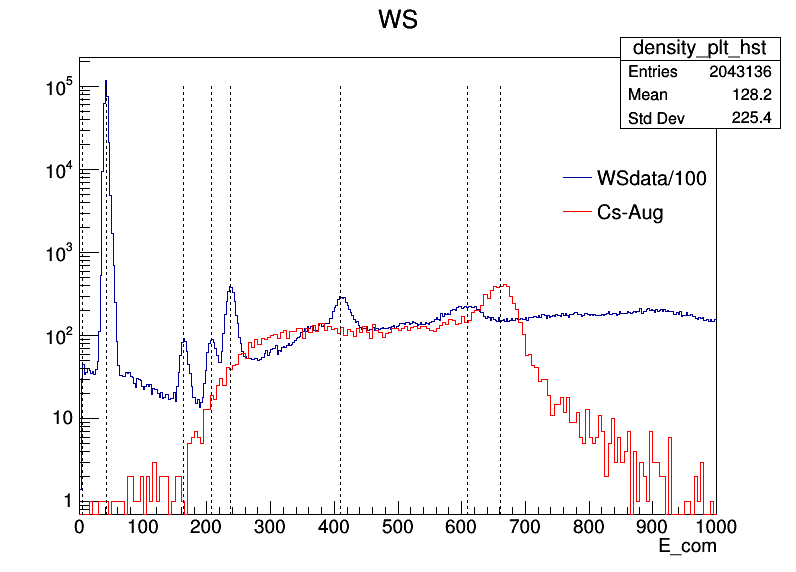

In [9]:
c2.SetLogy()
c2

<h1> Convert from root tree into a numpy array </h1>

In [10]:
E_Doke = ndarray( (n/10,),dtype= float64, buffer=chain2.GetV1())

In [11]:
n_Doke, xedges = histogram(E_Doke,arange(0,1000,10))

In [12]:
E_Doke.size

204313

In [13]:
bin_center=(xedges[1:]+xedges[:-1])/2

In [14]:
from matplotlib import pyplot as plt
%pylab inline  
#always do this for plotting...  don't ask why
#now set the size of figures to display in window
pylab.rcParams['figure.figsize'] = (10.0, 8.0) # set size of figures

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [15]:
#cut=~isnan(E_Gold) & (E_Gold>1)& (E_Gold<1000)
cut_Doke=~isnan(E_Doke) & (E_Doke>1)& (E_Doke<1000)

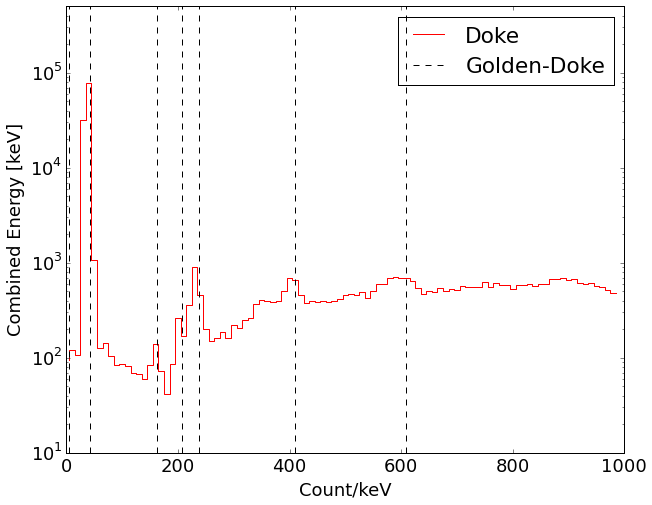

In [16]:
plt.step(bin_center,n_Doke,'r')
#plt.step(bin_center,n_Gold)
plt.yscale('log')
plt.xlabel('Count/keV')
plt.ylabel('Combined Energy [keV]')
plt.rcParams.update({'font.size': 18}) #increase all fontsizes

Energies=[5.2,41.55,163,207,236.8,410,609]
for ii, En in enumerate(Energies):
    plt.plot([En,En],[10,1e6],'--k')

ylim([10,5e5])
plt.legend(('Doke','Golden-Doke'))

<h1> Make a scatter plot of the discrimination band </h1>

In [10]:
c3 = rootnotes.default_canvas(name='WS')

In [34]:
fid_vol=TCut('drift>35 && drift<308 && correctedRadius<20') #no radial cut

In [35]:
area_cut=TCut('spikyS1>0 && spikyS1<50 && s2area_raw>150 && s1area<50 && log10(s2area/spikyS1)>1')

In [36]:
bad_area_cut=TCut('((goodArea<=630 && badArea < 80) || (goodArea>630 && badArea < 80+0.095*(goodArea-630)))')

In [37]:
chain2.SetMarkerStyle(7)
chain2.SetMarkerSize(10)
chain2.Draw('log10(s2area/spikyS1):spikyS1',fid_vol+area_cut+bad_area_cut)

1153L

In [38]:
au = 3.2  #use 3.10 for 2 sigma bounds #90% 3.007
bu = -0.1158 
    
al = 2.5; # use 2.592 #90% 2.682
bl =-0.1197;

fun1 = TF1( 'fun1', '{:g}*x^{:g}'.format(al,bl), 0, 50)
fun2 = TF1( 'fun1', '{:g}*x^{:g}'.format(au,bu), 0, 50)
fun1.Draw('Same')
fun2.Draw('Same')

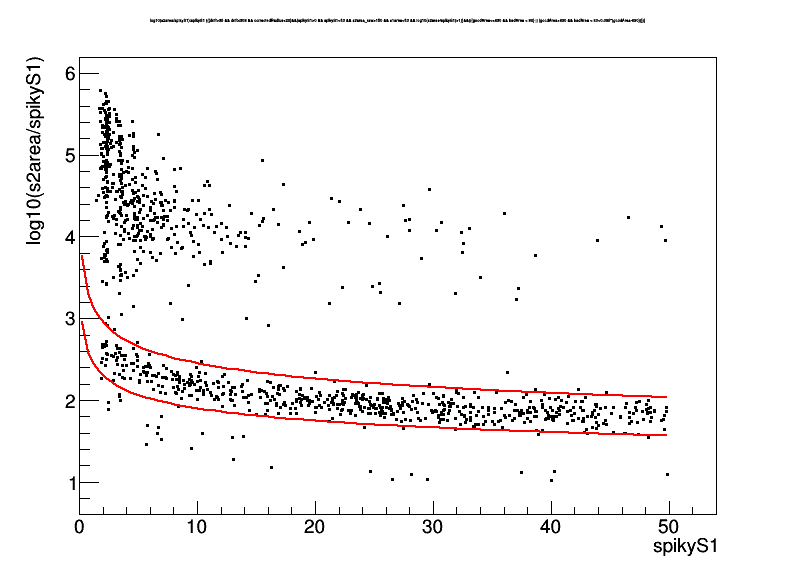

In [39]:
c3

<h1> Draw the X,Y distribution of the events </h1>

In [32]:
chain2.Draw('corrected_y:corrected_x',fid_vol+area_cut+bad_area_cut)

11120L

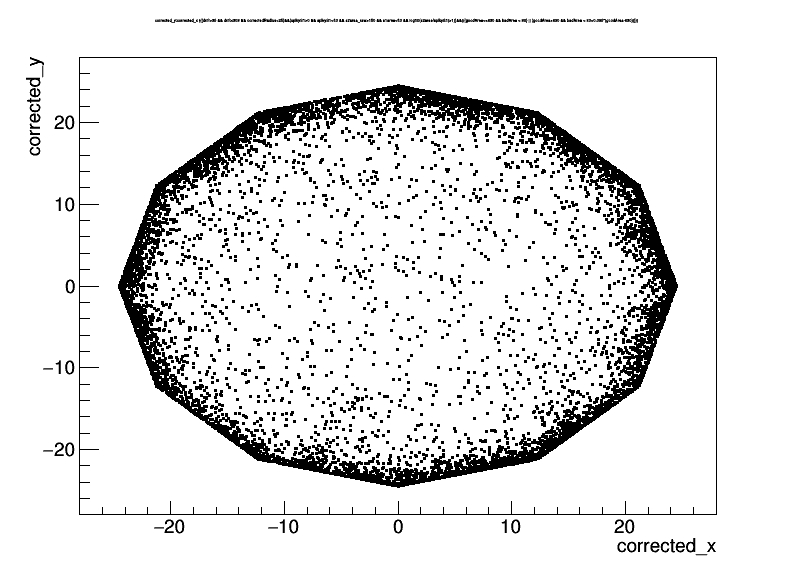

In [33]:
c3

<h1> Get the lux stamps of the events </h1>

In [42]:
cut=fid_vol+area_cut+bad_area_cut
#a=chain2.Scan('luxstamp',cut.GetTitle()) #return the cut as a string

In [43]:
n=chain2.Draw('luxstamp',cut.GetTitle())

In [44]:
a = ndarray( (n,),dtype= float64, buffer=chain2.GetV1())

In [45]:
a.size

21217

In [46]:
a[3]

7288802942440472.0

<h1> Get LUX stamps for CH3T data </h1>

In [12]:
g1=0.1167*0.9937
g2=12.05*0.9771

au = 3.10  #use 3.10 for 2 sigma bounds #90% 3.007
bu = -0.1158 
    
al = 2.592; # use 2.592  for 2 sigma #90% 2.682
bl =-0.1197;

er_cut_l=TCut('log10(s2area/spikyS1)>{:g}*spikyS1^{:g}'.format(al,bl))
er_cut_u=TCut('log10(s2area/spikyS1)<{:g}*spikyS1^{:g}'.format(au,bu))

fid_vol=TCut('drift>35 && drift<305 && correctedRadius<20') # && luxstamp/10**15>7.86'#add time cut ... 'luxstamp/10**15 ...&& luxstamp/10**15<8.5
area_cut=TCut('spikyS1>0 && spikyS1<100 && s1area<100 && s1area>0 && s2area_raw>150 && s2area>200 && s2area<10**6') #spikyS1
bad_area_cut=TCut('((goodArea<=630 && badArea < 80) || (goodArea>630 && badArea < 80+0.095*(goodArea-630)))')
ercut= er_cut_l.GetTitle() + '&&' + er_cut_u.GetTitle()
#energy_cut=TCut('1/73*(spikyS1/{:g}+s2area/{:g})'.format(g1,g2)+'<4 &&1/73*(spikyS1/{:g}+s2area/{:g})'.format(g1,g2)+'>1.5' )
combined_cut=TCut(fid_vol.GetTitle() + '&&'+ area_cut.GetTitle() + '&&' + bad_area_cut.GetTitle() + '&&' + ercut);

energy_cut=TCut('1/73*(spikyS1/{:g}+s2area/{:g})>{:g} && 1/73*(spikyS1/{:g}+s2area/{:g})<{:g}'
               .format(g1,g2,2,g1,g2,3))

n=chain5.Draw('luxstamp',combined_cut+energy_cut) #s1area

In [13]:
n

18624L

In [14]:
stamps= ndarray( (20,),dtype= float64, buffer=chain5.GetV1())
for ii in range(0,stamps.size):
    print("{:.0f},".format(stamps[ii]))

8258094274320394,
8258101547236187,
8258106098191756,
8258108244532941,
8258116306541022,
8258126888259184,
8258130911970431,
8258134464099531,
8258143327731768,
8258146147829511,
8258152987352269,
8258157637657406,
8258171096452233,
8258172657670715,
8258176854622033,
8258182710955306,
8258182919914420,
8258191688240670,
8258193814085858,
8258207846971391,
